In [346]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA

In [257]:
import warnings
warnings.filterwarnings('ignore')

In [258]:
#Reading dataset
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [259]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA

In [260]:
data.shape

(3999, 12)

We have 3999 rows and 12 columns

In [261]:
#checking information about the datatypes are correctly categorised
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


Our dataset consists of 12 numerical variables (including categorical variables), no missing values

In [262]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


The difference in the standard deviation is very large, Since that means that the values are generally far from the mean, making the values invalues to the dataset, Hence dropping the column is the next step

In [263]:
#Droping the ID# column
data.drop('ID#',axis=1,inplace=True)

axis=1 is to specify to drop the columns (axis=0 is for rows)
inplace=True makes these changes permanent

In [264]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [265]:
data.columns=data.columns.str.lower()
data.head()

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [266]:
data.rename(columns={'award?': 'awards'}, inplace=True)

In [267]:
data.awards.value_counts()

0    2518
1    1481
Name: awards, dtype: int64

This gives us a count for how many passengers have gotten the award(free flight) or not, 
here 1 is for the awarded and 0 is for the non rewarded

Number of miles earned with freq. flyer credit card in the past 12 months:

In [268]:
data.cc1_miles.value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

Number of miles earned with Rewards credit card in the past 12 months:

In [269]:
data.cc2_miles.value_counts()

1    3956
2      28
3      15
Name: cc2_miles, dtype: int64

Number of miles earned with Small Business credit card in the past 12 months:

In [270]:
data.cc3_miles.value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

# Data Preprocessing

In [271]:
#checking for any missing values
data.isna().sum()

balance              0
qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
bonus_miles          0
bonus_trans          0
flight_miles_12mo    0
flight_trans_12      0
days_since_enroll    0
awards               0
dtype: int64

In [272]:
data.nunique()

balance              3904
qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
bonus_miles          2734
bonus_trans            57
flight_miles_12mo     343
flight_trans_12        35
days_since_enroll    2820
awards                  2
dtype: int64

Since there are no missings values in our dataset what we can do is now to separate numerical columns for the categorical numeric columns

In [273]:
cat_list=[]
num_list=[]

for i in data.columns:
    unique_values=len(data[i].unique())
    if unique_values<6:
        cat_list.append(i)
    else:
        num_list.append(i)
        

In [274]:
cat_list

['cc1_miles', 'cc2_miles', 'cc3_miles', 'awards']

In [275]:
num_list

['balance',
 'qual_miles',
 'bonus_miles',
 'bonus_trans',
 'flight_miles_12mo',
 'flight_trans_12',
 'days_since_enroll']

Here we introduced two different empty list to separate our data to categorical and numerical, and we did that using a for loop, by checking if the length of the values of each column in our dataset, Since We have the length of the categorical columns under 6 and we found by using data.nunique(), Now we know we have 4 categorical and 7 numeric columns in our dataset

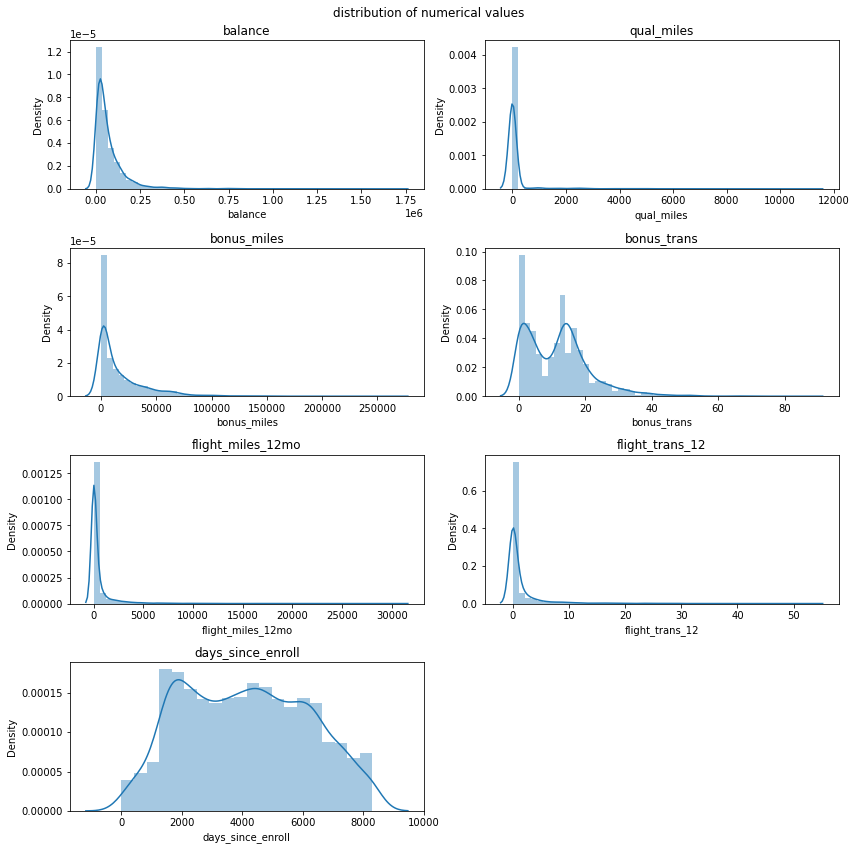

In [276]:
#lets just check the distribution of all the numerical columns
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
for i in data.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.distplot(data[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

Since all of them are right skewed except days_since_enroll that means the we have outliers and try to treat outliers now

In [277]:
out_list=["bonus_trans","flight_miles_12mo","flight_trans_12"]

# remove outliers;

for i in data.loc[:,out_list]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    data.loc[data[i] > up_lim,i] = up_lim
    data.loc[data[i] < low_lim,i] = low_lim
# we fixed outliers, now let's examine;

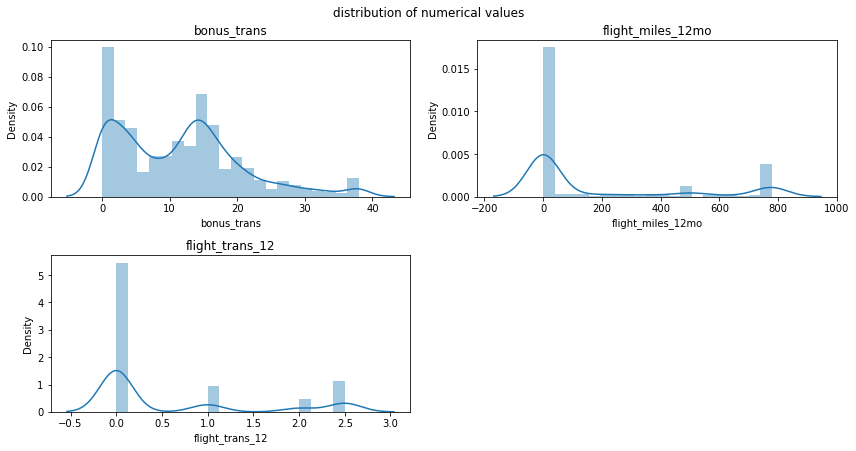

In [278]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
for i in data.loc[:,out_list]:
    plt.subplot(4,2,k)
    sns.distplot(data[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

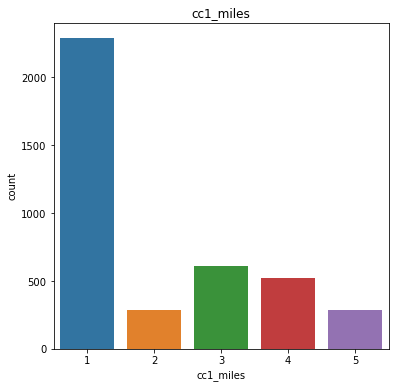

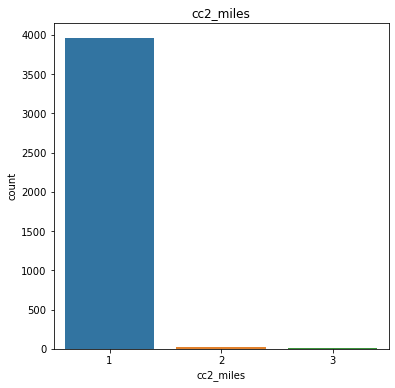

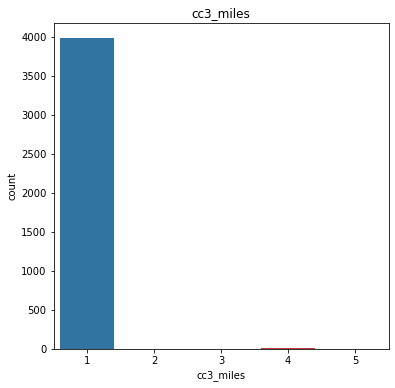

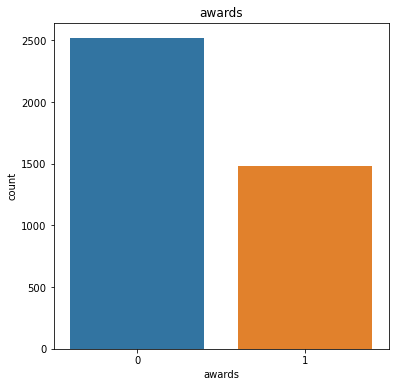

In [279]:
for i in cat_list:
    plt.figure(figsize=(6,6))
    sns.countplot(x = i, data =data.loc[:,cat_list])
    plt.title(i)

# Data visualisation

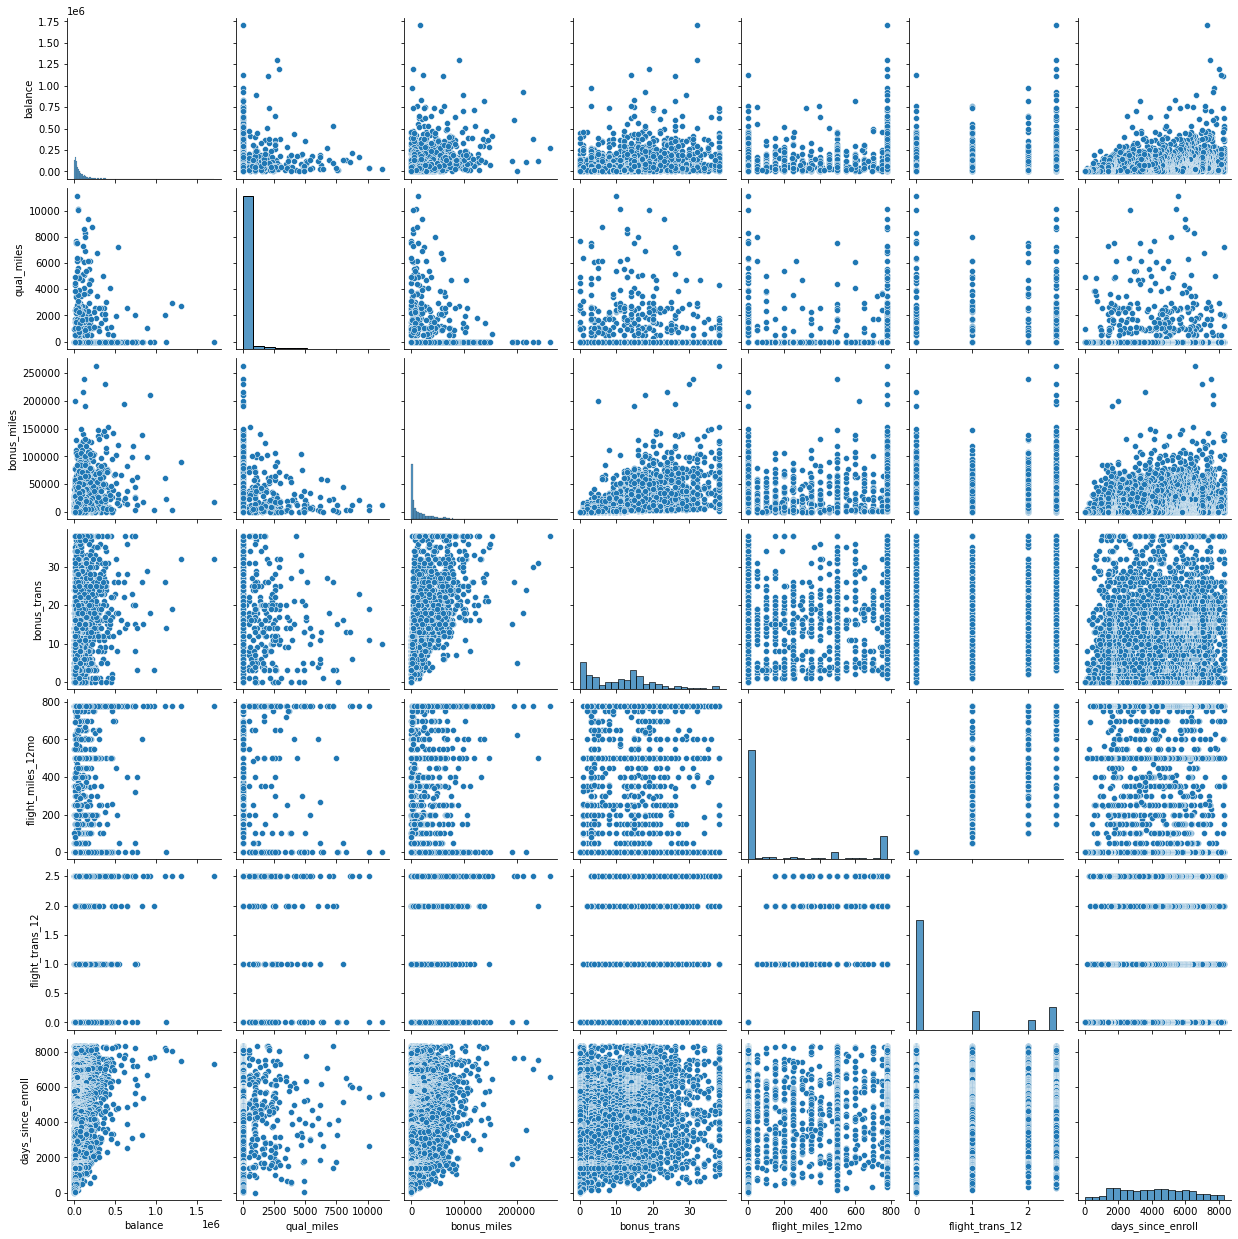

In [280]:
sns.pairplot(data.loc[:,num_list]);

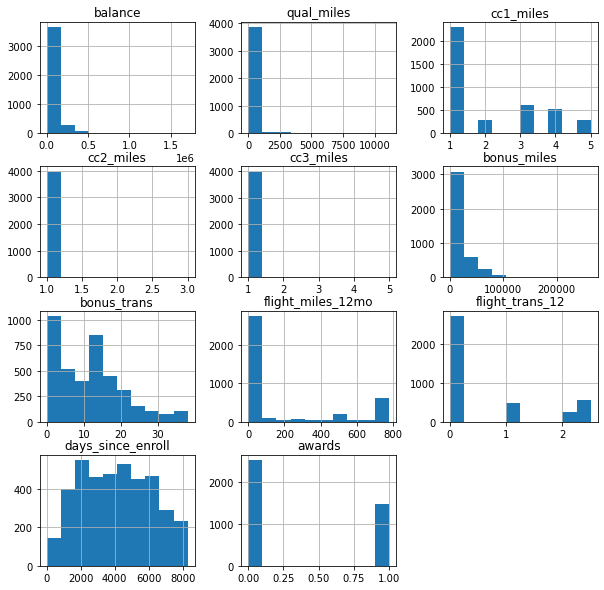

In [281]:
data.hist(figsize=(10,10));

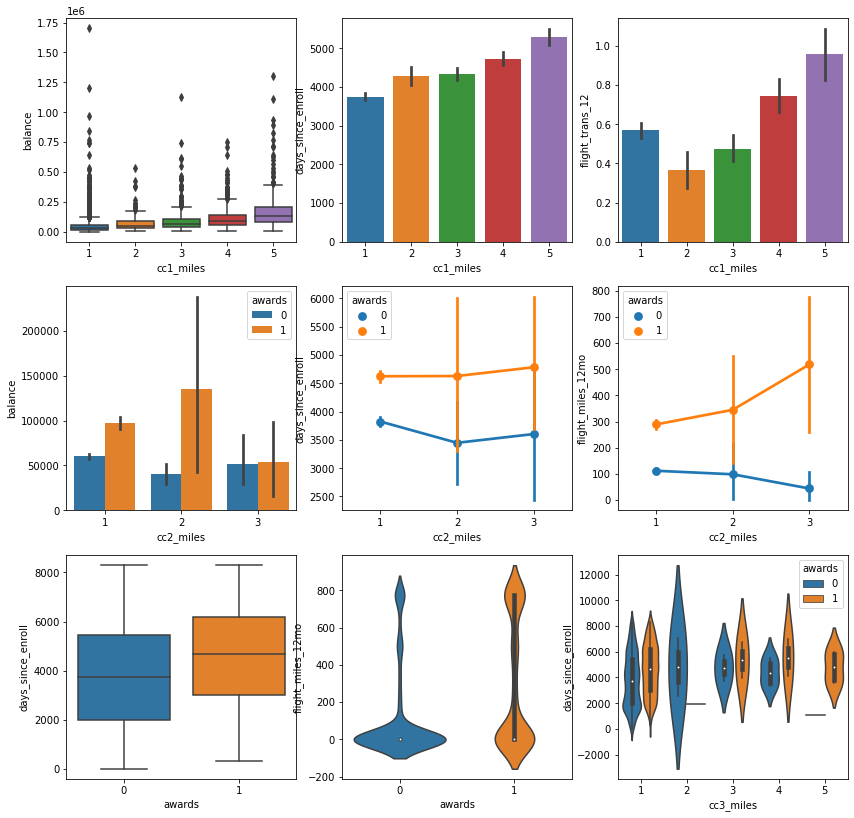

In [282]:
plt.figure(figsize=(14,14))
plt.subplot(3,3,1)
sns.boxplot(x="cc1_miles",y="balance",data=data)
plt.subplot(3,3,2)
sns.barplot(x ='cc1_miles',y ='days_since_enroll', data = data)
plt.subplot(3,3,3)
sns.barplot(x ='cc1_miles',y ='flight_trans_12', data = data)
plt.subplot(3,3,4)
sns.barplot(x ='cc2_miles',y ='balance',hue="awards", data = data)
plt.subplot(3,3,5)
sns.pointplot(x ='cc2_miles',y ='days_since_enroll', data = data,hue="awards")
plt.subplot(3,3,6)
sns.pointplot(x ='cc2_miles',y ='flight_miles_12mo', data = data,hue="awards")
plt.subplot(3,3,7)
sns.boxplot(x ='awards',y ='days_since_enroll', data = data)
plt.subplot(3,3,8)
sns.violinplot(x ='awards',y ='flight_miles_12mo', data = data)
plt.subplot(3,3,9)
sns.violinplot(x ='cc3_miles',y ='days_since_enroll',hue="awards", data = data)
plt.show()

In this cell we have multiple different plots used to visualise data all giving us information on how each column is co-related by the other! Since to have better understanding we can use heat map to check the corelation between each column

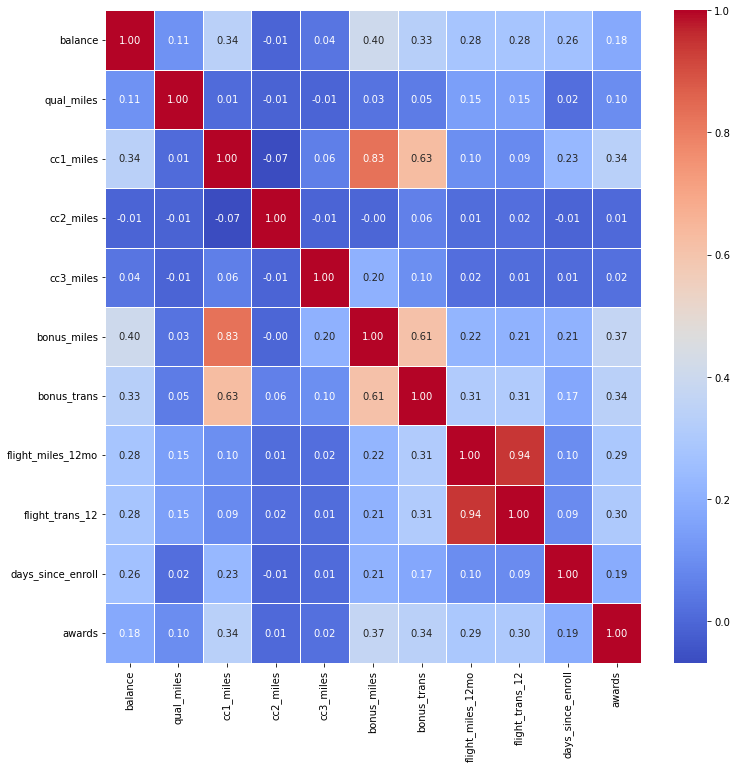

In [283]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,linewidths=0.8,fmt=".2f",cmap="coolwarm")
plt.show()

we got some interesting yet logical information through this heat map since we have gotten a very high corelation between flight_miles_12mo and flight_tran_12 it is obvious like how much transaction we do on flights in 12 months also increases out flights travel increasing the miles eventually, we got corelation between bonus transaction and bonus miles since its also likely if you have bonus trans gives you bonus miles, we also got a high in the non flight bonus transaction with miles earned with freq flyer this was interesting!

# k Means

In [284]:
kmeans=KMeans().fit(data)

In [285]:
score=[]
K=range(1,20)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=3)
    kmeans.fit(data)
    score.append(kmeans.inertia_)

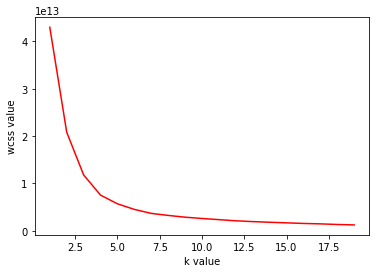

In [286]:
plt.plot(K,score,color="red")
plt.xlabel("k value")
plt.ylabel("wcss value")
plt.show()

#K-elbow 

number of clusters 3-4 selectable

In [287]:
wcss

[3127.579614666671,
 1996.596569689393,
 1350.9506652561977,
 1101.587967049775,
 917.9009604605135,
 803.9255606097561,
 706.2988909425047,
 633.4608980779942,
 587.115144664567,
 555.0322236055326]

In [288]:
k_m=KMeans(n_clusters=4,random_state=42,max_iter=100)
cluster=k_m.fit(scaled)

In [289]:
cluster=cluster.labels_

In [290]:
cluster=pd.DataFrame(cluster)

In [291]:
cluster.head()

,0
0,2
1,2
2,2
3,2
4,3


In [292]:
data.insert(1,'cluster',cluster)

In [293]:
data.head()

,balance,cluster,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,awards
0,28143,2,0,1,1,1,174,1,0.0,0.0,7000,0
1,19244,2,0,1,1,1,215,2,0.0,0.0,6968,0
2,41354,2,0,1,1,1,4123,4,0.0,0.0,7034,0
3,14776,2,0,1,1,1,500,1,0.0,0.0,6952,0
4,97752,3,0,4,1,1,43300,26,777.5,2.5,6935,1


In [294]:
data['cluster'].value_counts()

2    2083
1     871
3     610
0     435
Name: cluster, dtype: int64

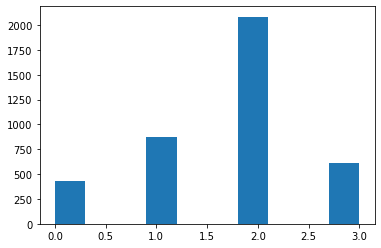

In [295]:
plt.hist(data=data,x='cluster')
plt.show()

In [296]:
from sklearn.metrics import silhouette_score

In [297]:
silhouette_score(scaled,k_m.fit_predict(scaled))

0.44822404999781135

# Hierarchical Clustering

In [347]:
# We will check clustering for two different scaling functions
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [348]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.66666667 0.         ... 0.84374246 0.         0.25      ]
 [0.01128788 0.66666667 0.         ... 0.83988425 0.         0.25      ]
 [0.02425685 0.66666667 0.         ... 0.84784181 0.         0.25      ]
 ...
 [0.0431695  0.33333333 0.         ... 0.16879672 1.         0.75      ]
 [0.03220189 0.         0.         ... 0.16867615 0.         1.        ]
 [0.00176908 0.66666667 0.         ... 0.16831444 0.         0.25      ]]


[[-4.51140783e-01  3.32049877e-01 -1.86298687e-01 ...  1.39545434e+00
  -7.66919299e-01 -8.34774145e-01]
 [-5.39456874e-01  3.32049877e-01 -1.86298687e-01 ...  1.37995704e+00
  -7.66919299e-01 -8.34774145e-01]
 [-3.20031232e-01  3.32049877e-01 -1.86298687e-01 ...  1.41192021e+00
  -7.66919299e-01 -8.34774145e-01]
 ...
 [-4.29480975e-05 -8.42015074e-01 -1.86298687e-01 ... -1.31560393e+00
   1.30391816e+00  1.01007902e+00]
 [-1.85606976e-01 -2.01608002e+00 -1.86298687e-01 ... -1.31608822e+00
  -7.66919299e-01  1.93250561e+00]
 [-7.00507951e-01  3.320

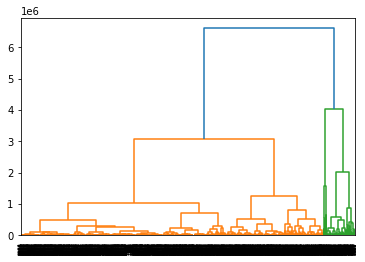

In [298]:
dendogram=sch.dendrogram(sch.linkage(data,method="ward"))
plt.show()

In [353]:
from sklearn.cluster import AgglomerativeClustering

In [355]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=5)

In [356]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1585
2     868
0     613
4     501
3     432
Name: clustersid, dtype: int64

In [357]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. minmaxscaler
data['clustersid_s1']=H_clusters.labels_
data

data1['clustersid_s1']=H_clusters.labels_

In [359]:
data1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,balance,cluster,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,awards,clusterid_DBSCAN
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,136039.153344,2.990212,392.554649,2.624796,1.021207,1.042414,34692.543230,18.590538,663.934747,2.123165,4704.590538,1.0,0.970636
1,1,35673.528707,2.000000,70.230915,1.096530,1.019558,1.005047,3160.095268,6.095268,6.945110,0.047319,3583.504101,0.0,-0.001262
2,2,69520.239631,1.000000,132.597926,2.687788,1.011521,1.001152,24818.421659,13.284562,27.059908,0.140553,4568.897465,1.0,1.996544
3,3,89067.837963,0.000000,178.972222,1.826389,1.006944,1.000000,13312.675926,11.733796,611.229167,1.912037,4014.879630,0.0,3.000000
4,4,110930.720559,1.988024,63.774451,3.526946,1.001996,1.027944,29927.133733,16.395210,12.985030,0.081836,4403.433134,0.0,-0.005988


In [360]:
sil_score= silhouette_score(scaler1_df, H_clusters.labels_)
sil_score

0.4515931914403183

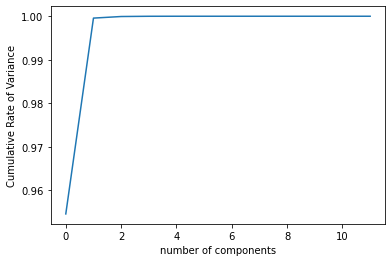

In [299]:
pca=PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel("number of components")
plt.ylabel("Cumulative Rate of Variance")
plt.show()

we can choose the optimum set as 2



In [300]:
#final model
pca=PCA(n_components=2).fit(data)

In [301]:
#variance ratio
pca.explained_variance_ratio_

array([0.95456048, 0.04501287])

Gives an approximate 100% explainability rate with 2 components & a vector of the variance explained by each dimension.

# DBSCAN


In [307]:
from sklearn.cluster import DBSCAN

In [310]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [311]:
data1=data

In [312]:
# We will check clustering for two different scaling functions
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [316]:
# Normalizing data using MinMaxScaler
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

[[0.01650773 0.66666667 0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.66666667 0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.66666667 0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.33333333 0.         ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.4        0.16867615 0.        ]
 [0.00176908 0.66666667 0.         ... 0.         0.16831444 0.        ]]


In [317]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)

DBSCAN(eps=1, min_samples=12)

In [318]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [319]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64

In [320]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score

0.3835043146972772

In [323]:
# for epsilon = 0.5
dbscan3 = DBSCAN(eps=0.5, min_samples=12)
dbscan3.fit(scaler1_df)

y=pd.DataFrame(dbscan3.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan3.labels_)
print('silhouette score: ',sil_score)

 0    2053
 2     858
 1     592
 3     426
-1      58
 4      12
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.3096265155018101


In [321]:
# for epsilon = 0.8
dbscan1 = DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler1_df)

y=pd.DataFrame(dbscan1.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)

 0    2516
 1    1479
-1       4
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.3785285096695147


In [335]:
# for epsilon = 0.59
dbscan4 = DBSCAN(eps=0.59, min_samples=12)
dbscan4.fit(scaler1_df)

y=pd.DataFrame(dbscan4.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan4.labels_)
print('silhouette score: ',sil_score)

 0    2081
 2     867
 1     604
 3     432
-1      15
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.49552456766883063


In [345]:
# for epsilon = 0.66
dbscan2 = DBSCAN(eps=0.66, min_samples=12)
dbscan2.fit(scaler1_df)

y=pd.DataFrame(dbscan2.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan2.labels_)
print('silhouette score: ',sil_score)

 0    2081
 2     868
 1     608
 3     433
-1       9
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4970711354207088


In [336]:
data['clusterid_DBSCAN'] = dbscan4.labels_
data1['clusterid_DBSCAN'] = dbscan4.labels_

In [337]:
data1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,balance,cluster,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,awards
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,243891.600000,1.733333,1364.866667,3.200000,1.000000,3.333333,88872.600000,23.666667,350.300000,1.233333,4416.466667,0.666667
1,0,53248.962999,2.000000,68.845267,1.678039,1.015377,1.004325,9461.214320,8.535320,7.657857,0.052859,3782.222970,0.000000
2,1,134227.786424,3.000000,382.965232,2.610927,1.021523,1.006623,33542.408940,18.483444,667.740066,2.134106,4699.355960,1.000000
3,2,69563.268743,1.000000,119.892734,2.687428,1.011534,1.001153,24832.379469,13.288351,27.091119,0.140715,4567.735871,1.000000
4,3,89067.837963,0.000000,178.972222,1.826389,1.006944,1.000000,13312.675926,11.733796,611.229167,1.912037,4014.879630,0.000000
